# Sistemas de ecuacones Lineales I

## Motivación

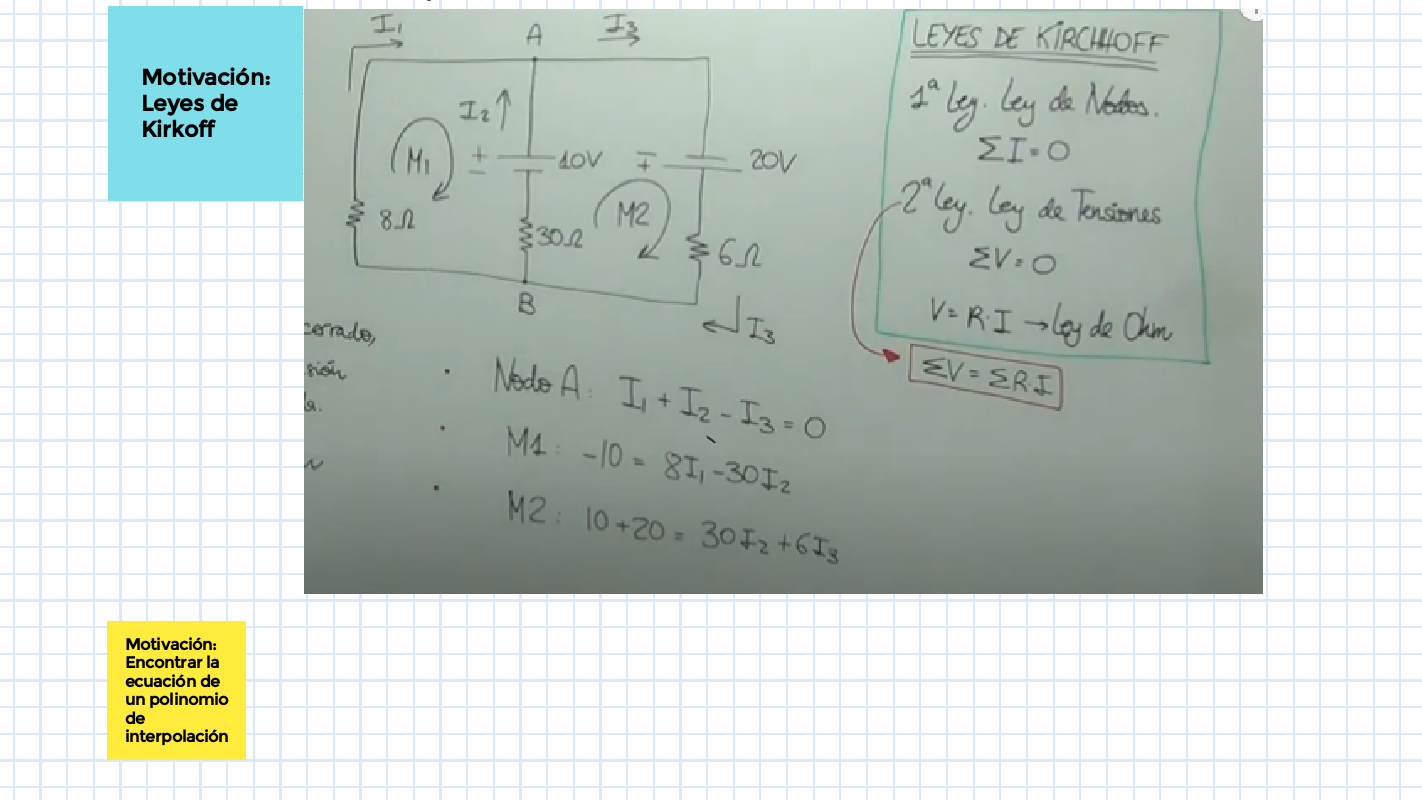

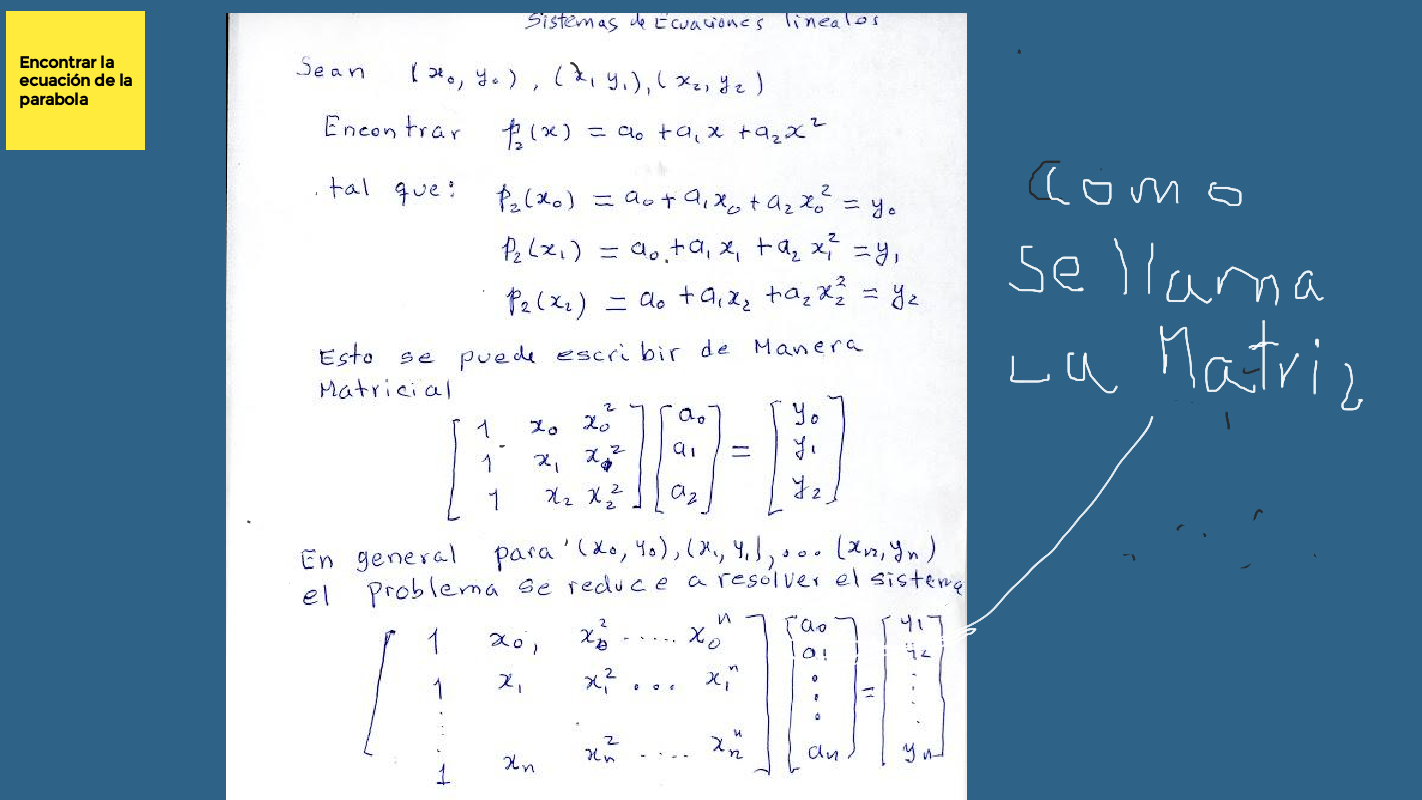

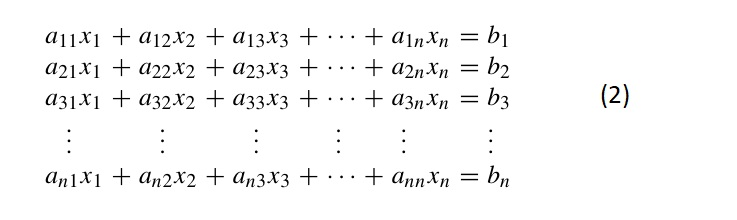

### Ejemplo 1
 Suponga que se le pide que diseñe el primer ascenso y descenso de una montaña rusa. Al estudiar otras atracciones, se decide que la pendiente del ascenso debe ser $0.8$ y la pendiente de la caída debe ser $−1.6$. Decides conectar dos lineas $L_1(x)$ y $L_2(x)$ con   una función cuadrática, $ f (x) = ax^2 + bx + c$ x se mide en pies. Para que la pista sea suave no puede haber cambios bruscos. Por lo que desea que los segmentos lineales sean tangentes a la parte cuadrática en la transición ($f(x)$). Los puntos $P$ y $Q$  están separados por 100 pies en dirección horizontal. Para simplificar las cosas, colocamos el origen en  $P$. Obtenga  las ecuaciones que asegurarán tu tramo de montaña rusa tenga transiciones suaves y expresa esto en forma de matriz.
 Necesitamos encontrar $a$, $b$, $c$ y $d$  con la propiedad de que se mantengan las condiciones de continuidad se mantienen, es decir, $f (0)=L_1 (0)$ y$f(100)=L_2(100)$. Y las condiciones de suavidad requieren
 que  $f^{'} (0)=L^{'}_1(0)$ y que $f^{'}(100)=L^{'}_2(100)$ . Esto
 nos da:
 &nbsp;

 $$
 a(0^2)+b(0)+c=0 \\
 a(100^2)+b(100)+c=-1.6(100)+d \\
 2a(0)+b=0.8 \\
 2a(100)+b=-1.6
 $$



Rearreglando términos podemos expresar las cuatro ecuaciones
 en forma matricial 
 &nbsp;
 \begin{equation}
\begin{bmatrix}
0 & 0 & 1 & 0\\
10^4 & 10^2 & 1 & -1\\
0 & 1 & 0 & 0 \\
200 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
a &\\
b & \\
c & \\
d &
\end{bmatrix}
=
\begin{bmatrix}
0 &\\
-1600 & \\
0.8 & \\
-1.6&
\end{bmatrix}
\end{equation} 








Es fácil ver de la primera condición de continuidad  que 
 $c=0$  y de la primera condición de suavidad tenemos que b=0.8
  de aqui es directo que $a=-0.012 \quad $ y $\quad d=120$

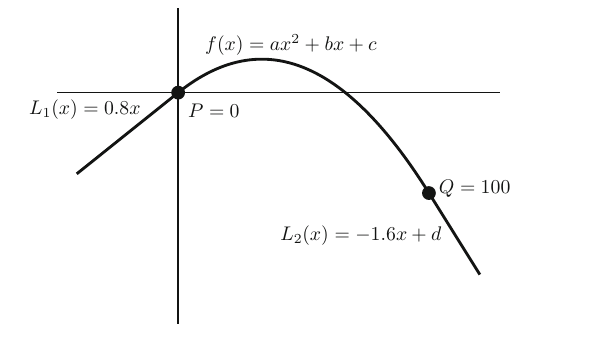

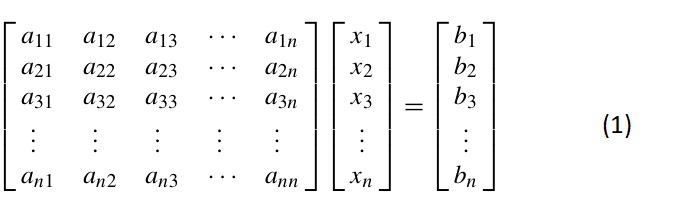

## Eliminación Gaussiana
1. eliminar todas la incognita $x_1$ de todas las ecuaciones excepto de la primera. Multiplicando el  primer renglón   por $m_{1j}=\frac{a_{j1}}{a_{11}}$ y restarsela  al renglón  $j$

   $$ a_{j1}-ma_{11}=a_{j1}-\frac{a_{j1}}{a_{11}}a_{11}=0$$


El nuevo sistema de ecuaciones es 

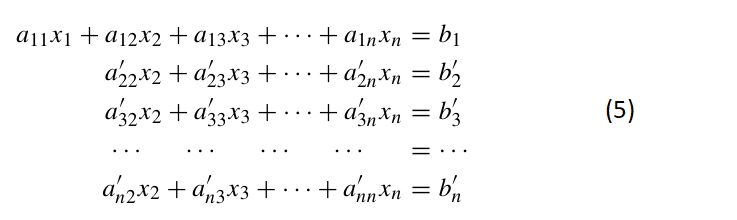

El nuevo sistema Matricial 

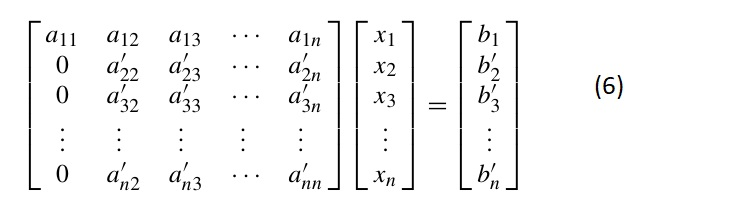

Los coeficientes modificados estan dados por:

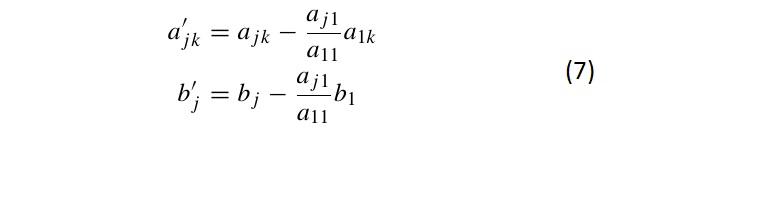

Esta operación puede ser descrita por el siguiente cíclo

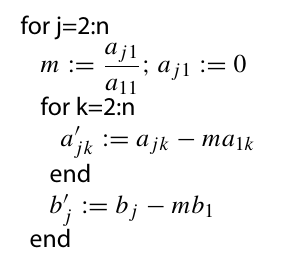

Hacemos el mismo procedimiento a la matriz que queda quitando el primer renglón y primer columna 

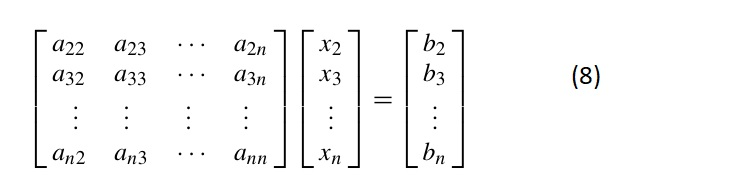

El procedimiento se puede repetir para el sistema (8) , para eliminar $x_2$ y así hasta que obtengamos un sistema triangular 

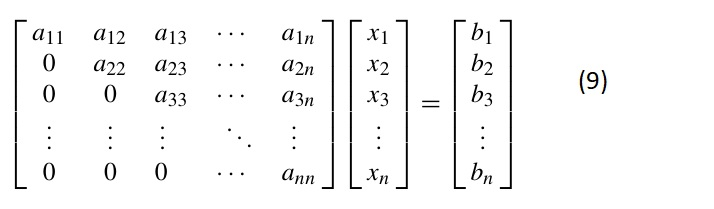

Este proceso es llamado la fase de eliminación.Y se puede expresar de la siguiente forma :

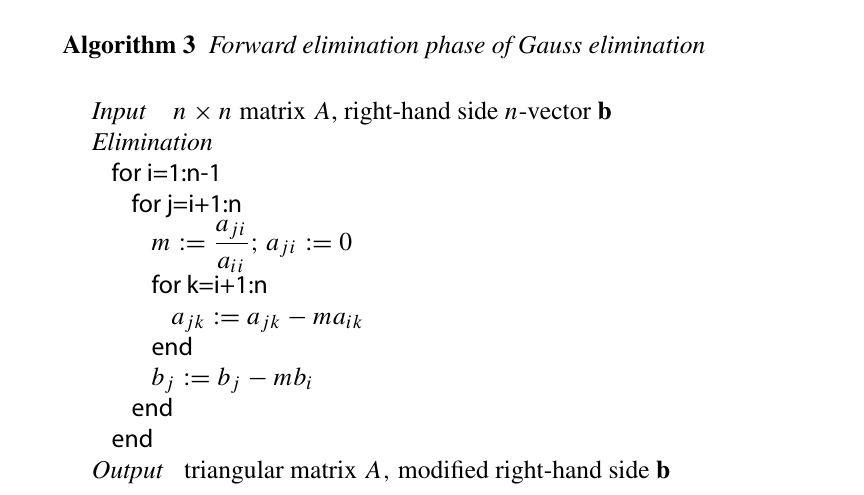





###La segunda fase del proceso se llama el proceso de substitución hacia atrás 

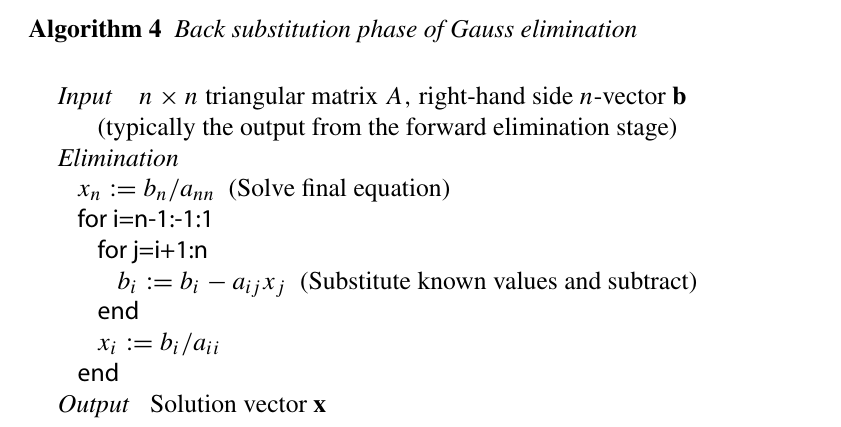

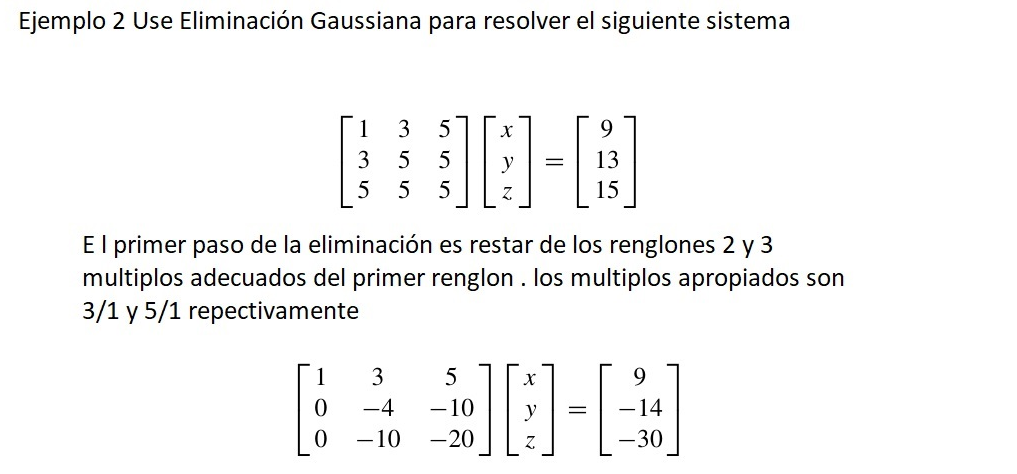

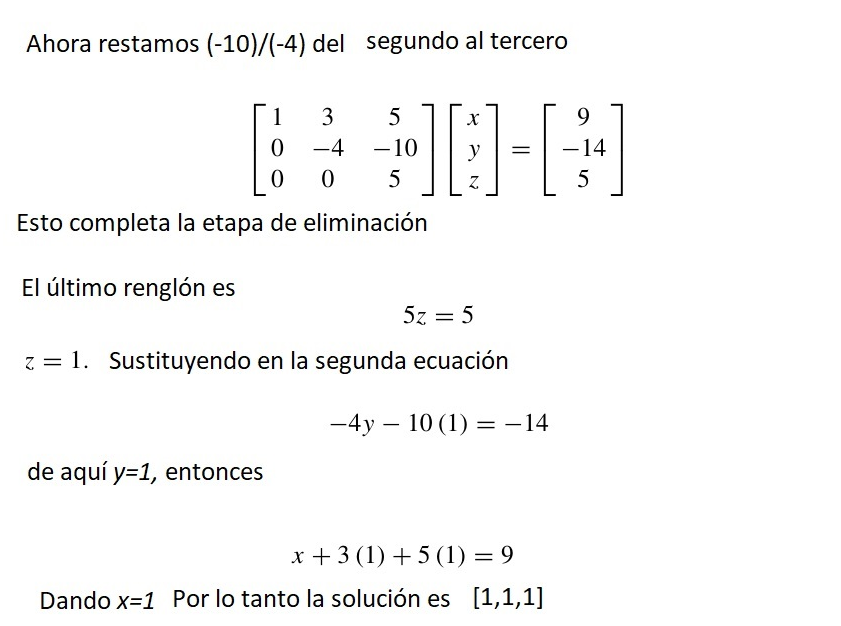

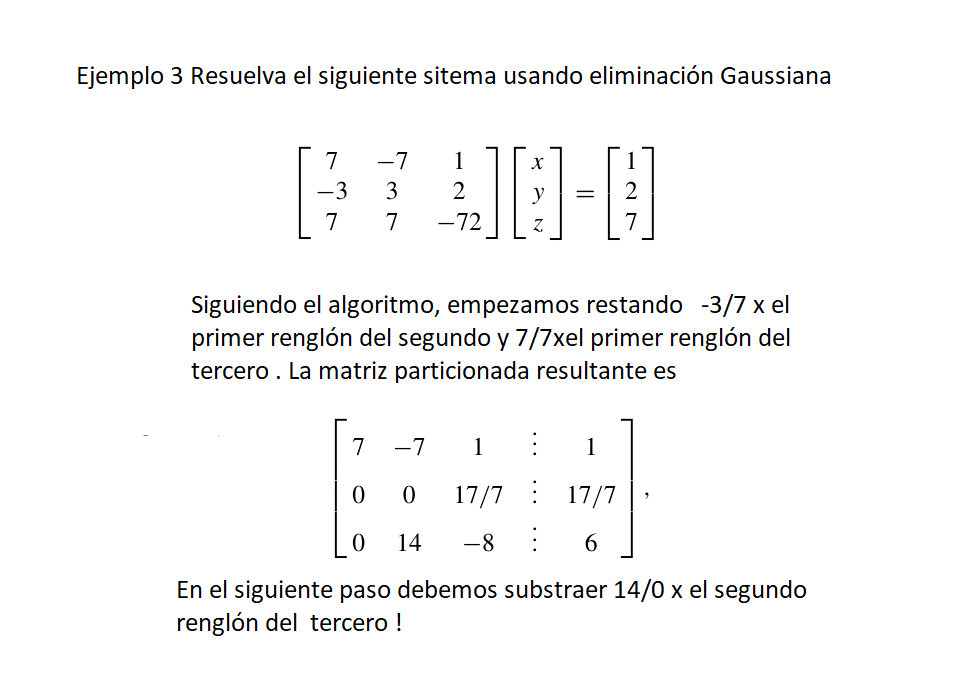

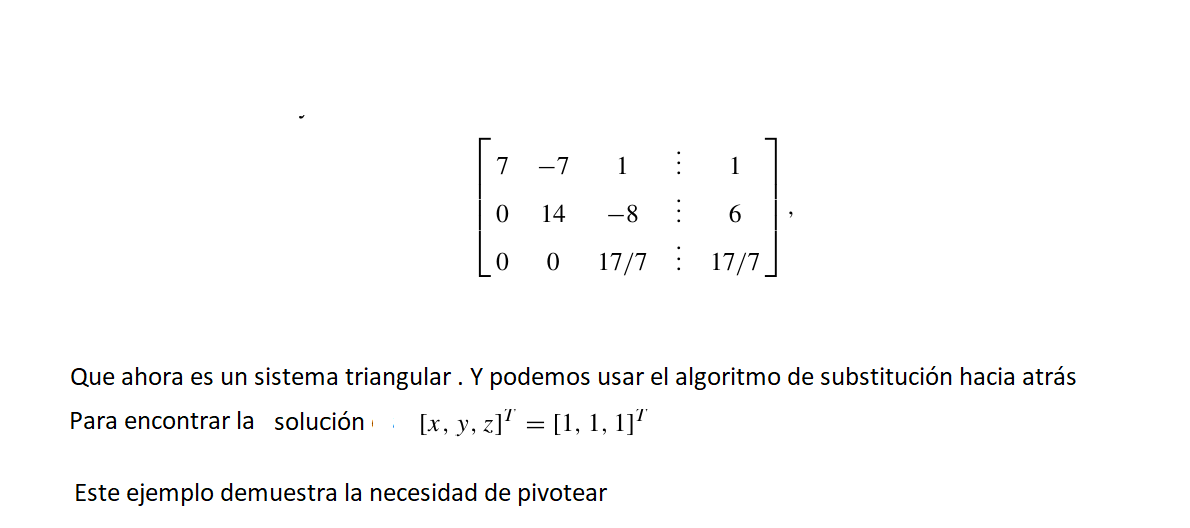

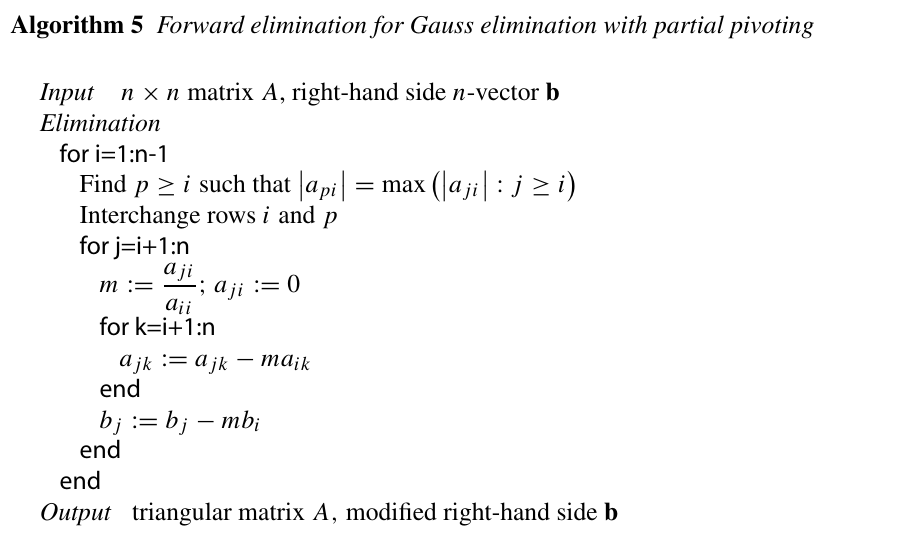

## Eliminación Gaussiana con pivoteo parcial

1. En cada paso se usa el elemento de la diagonal para generar los multiplicadores 
1. El efecto de un pivote igual  acero 
3. La idea Básica del pivoteo parcial es evitar pivotes cero (o cercanos acero 

### Ejemplo 
Use eliminación Gaussiana para resolver el ejemplo anterior con aritmética acuatro digitales.
a. En el primer paso el multiplicador usado para producir el cero en el segundo renglón es -3/7=0.4286.El sistema resultante es: 

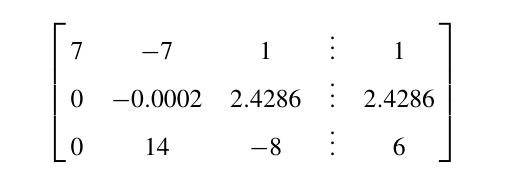

Ahor el multiplicador que se debe usar es 14/-0.0002=-7000 , después de efectuar los calculos obtenemos

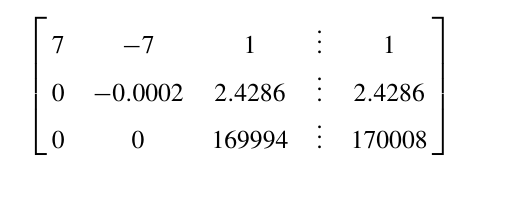

De aquí obtenemos la solución (calculada a 7 decimales 

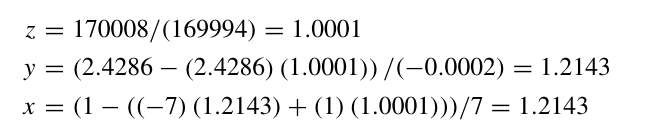

El problema es que el segundo pivote esta dominado por su error de redondeo. lo cual resulta en que el  multiplicador  magnifica los erroes de redondeo de las demás entradas.

LA idea básica del pivoteo es busacar en o debajo de la diagonal el elemento mas grande en valor absoluto, el renglón donde se encuentre este elemento se intercambia conel renglón de la diagonal, de tal manera de que el elemento mas grande se el nuevo pivote.

### Ejemplo
Repita el ejemplo usando pivoteo parcial 
el primer paso de la eliminación queda igual 



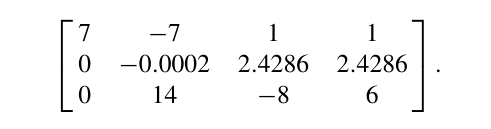

 Intercambiando los renglones 2do Y 3ero se produce  

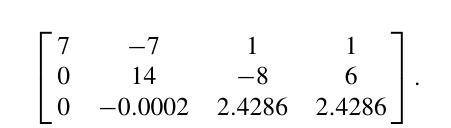

Cuyo Multiplicadores (-0.0002)/14=0 ,dando ub arreglo final de 

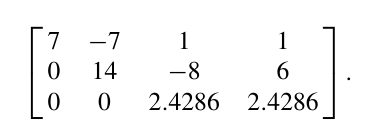

El uso del pivoteo requiere solo un pequeño cambio en el algoritmo de eliminación Gaussiana  

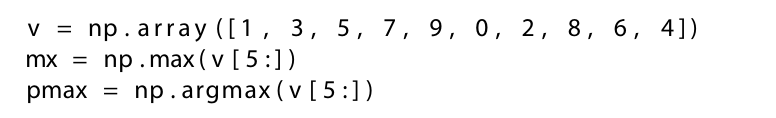

In [ ]:
import numpy as np
v=np.array([1,3,5,7,9,0,2,8,6,4])
mx=np.max(v[5:])
print(v[5:])
pmax=np.argmax(v[5:])
print(mx, pmax)

[0 2 8 6 4]
8 2


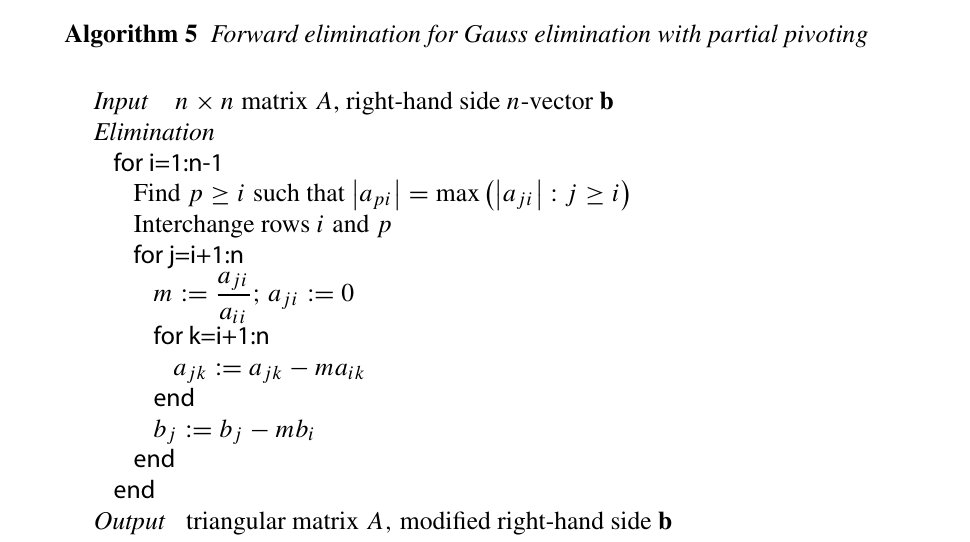

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 15 23:10:53 2020

@author: fserg
"""
import numpy as np
def gepp( A , b ):
    A=A.copy()
    b=b.copy()
    n=A.shape[0]
    for i in range(n-1) :
# f i n d the pivot p o s i t i o n
        p = np.argmax(np.abs ( A[i:,i ] ) )
        p+= i
        # row i n t e r c h a n g e
        A[[ i , p] , :] = A[[p , i ] , :]
# i n t e r c h a n g e on r i g h t −hand s i d e
        b[[ i , p]] = b[[p, i ]]
        for j in range ( i + 1 , n ) :
            m = A[ j , i ] / A[ i , i ]
            A[ j , i ] = 0
            A[ j , i + 1 : ] -= m *A[ i , i + 1 : ]
            b [ j ] -= m * b [ i ]
# Back s u b s t i t u t i o n 
    x= np.zeros_like( b )
    x[-1] = b[-1] / A[-1,-1]
    for i in range( n-1,-1,-1) :
        for j in range( i + 1 , n ) :
            b[ i ] -= A[ i , j ] * x[ j ]
            x [ i ] = b[ i ] / A[ i , i ]
    return x



In [ ]:
import numpy as np
#from prg_gepp import gepp
b=(1/6**2)*np.array([1,1,1,1,1])
A=np.array([[2,-1,0,0,0],[-1,2,-1,0,0],[0.,-1,2.,-1.,0],[0.,0.,-1.,2,-1.],[0,0,0,2,-1]])
x=gepp(A,b)
print('\nel resultado es x=', x)



el resultado es x= [ 2.77777778e-02  2.77777778e-02  5.20417043e-18 -5.55555556e-02
 -1.38888889e-01]


import numpy as np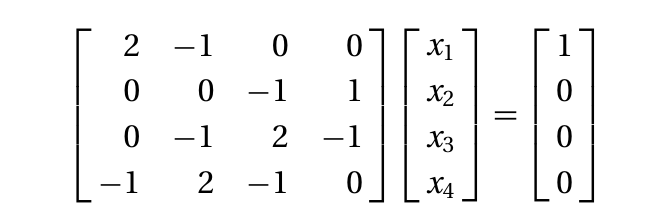

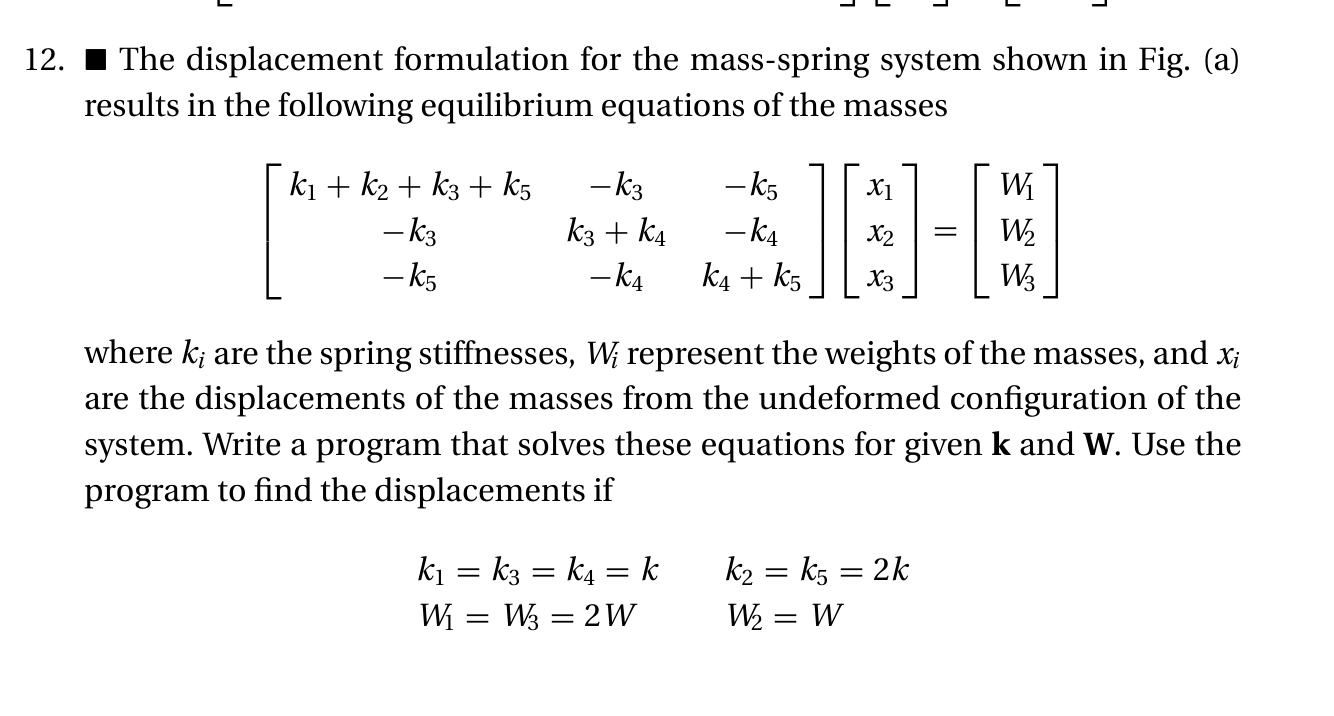

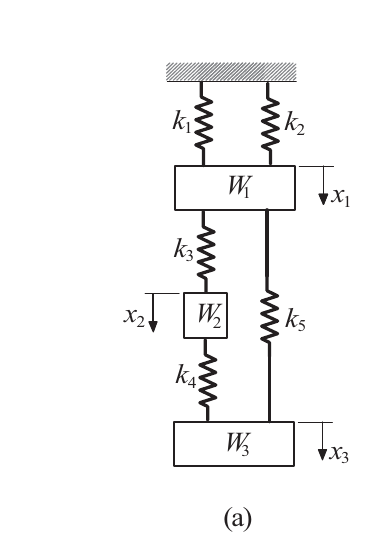

/content


## Ejercicio
Resuelva el siguiente sistema 

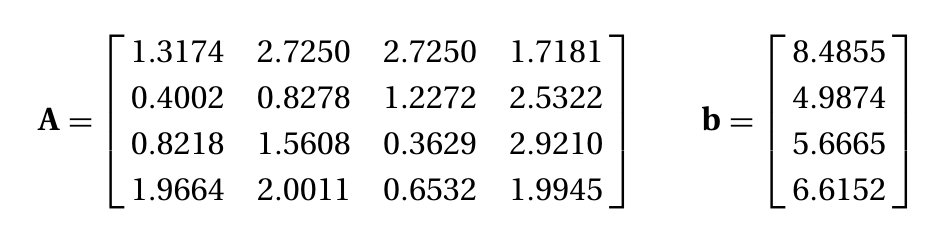

####Pruebe el algoritmo con la matriz de Hilbert
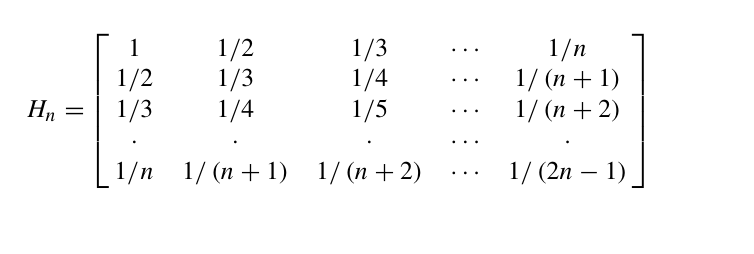

##### Los elementos son $$h_{ij}=\frac{1}{i+j-1}$$

### Ejemplo 
Resuelva el sistema de Hilbert  de dimensión 6 usando  eliminación Gaussiana con pivoteo parcial 

In [ ]:
from scipy.linalg import hilbert
import numpy as np
#from prg_gepp import gepp
H=hilbert(6)
rsH = np.sum(H,axis=1 )
x=gepp(H,rsH )
np.set_printoptions(precision=5)
print(x)

[1. 1. 1. 1. 1. 1.]


experimentar con diferentes valores de n y diferentes precisiones 

In [ ]:
!pwd

/content


In [ ]:
from scipy.linalg import hilbert
import numpy as np
H=hilbert(6)
H

array([[1.     , 0.5    , 0.33333, 0.25   , 0.2    , 0.16667],
       [0.5    , 0.33333, 0.25   , 0.2    , 0.16667, 0.14286],
       [0.33333, 0.25   , 0.2    , 0.16667, 0.14286, 0.125  ],
       [0.25   , 0.2    , 0.16667, 0.14286, 0.125  , 0.11111],
       [0.2    , 0.16667, 0.14286, 0.125  , 0.11111, 0.1    ],
       [0.16667, 0.14286, 0.125  , 0.11111, 0.1    , 0.09091]])

In [ ]:
np.set_printoptions(precision=15)
print(x)

[0.999999999999072 1.000000000026699 0.999999999818265 1.000000000474873
 0.999999999473962 1.000000000207872]


### *Def*: 
Un sistema lineal se dice mal condicionado si la acumulación de los erroes de redondeo son severos o la solución es muy sensible a pequeños cambios en los datos . en el caso de las matrices de Hilbert, la severidad de el mal condicionamiento crece rapidanebte con la dimensión de la matriz


In [ ]:
np.random.seed(42)
E=np.zeros((100,7))
for n in range(4,11):
  for k in range(100):
    A=10*np.random.random((n,n))-5
    b=np.sum(A,axis=1)
    x=gepp(A,b)
    E[k,n-4]=np.max(np.abs(x-1))

In [ ]:
np.max(E)

4.998224056862455e-13

In [ ]:
np.sum(E>1e-14)

43

###### Cada ensayo genera una matriz aleatoría con entradas en el intervalo $[-5,5]$, la matriz $E$ contiene el elemento con error máximo en cada ensayo . Su entrada mas grande corresponde al componete con el máximo error de los 700 experimentos  

In [ ]:
np.max(E)

Esta salida muestra que ninguna de las matrices generadas contiene errore muy grandes. Desde luego alguna de ellas estanmal condicionada el comando 

In [ ]:
np.summ(E>1e-14)

Cuenta el numero de experimentos para los cuales el maximo error fue mas grande que $10^{-14}$

### Sistemas tridiagonales
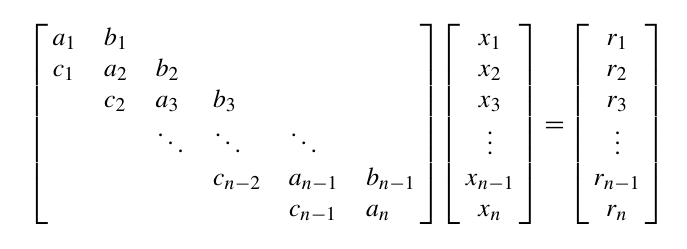

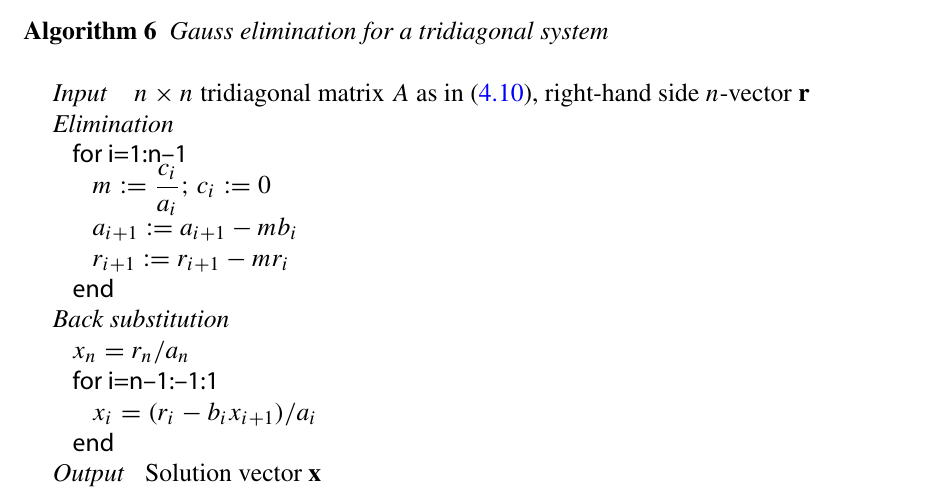

 #### Ejemplo
 Suponga que la temperatura esta estable o dicho de otra manera $u_t=0$

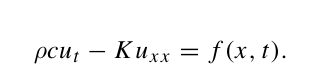

La ecuación se convierte en $-Ku_{xx}=f(x)$, la temperatura en los extremos es de $0$ grados y f(x)=1 para $x\in[0,1]$, aproximando la derivada  con tecnicas de aproximación que vimos antes obtenemos , en 5 puntos igualmente espaciados en el interior del alambre podemos plantear el sistema de ecuaciones lineales de la sigjuiente manera :
1. hay 5 puntos interiores en $[0,1]$ entonces $\Delta x=\frac{1}{6}$ y podemos definir los nodos como $x_i=i\Delta x$ para $i=0,1,2,\cdots,6$ 

2. sea $u_i$ la aproximación de $u(x_i)$, nuestros requerimientos de frontera significan que $u_0=u_6=0$,  las incognitas son $u_1,u_2,\cdots,u_5$.

3. Usando nuestras aproximaciones anteriores para $i=1,2,\cdots,5$ obtenemos 
&nbsp;

$$
-[\frac{u_{i-1}-2u_i+u_{i+1}}{\Delta x^2}]=f_i
$$
&nbsp;
Estonos lleva al sistema tridiagonal 

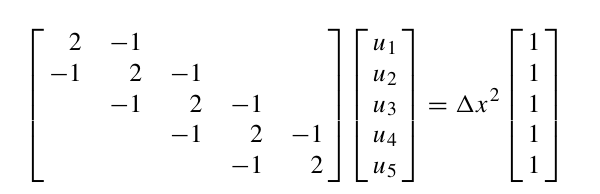

usando que $\Delta x=\frac{1}{6}$ la fase de eliminación obtenemos un sistema bigiagonal 
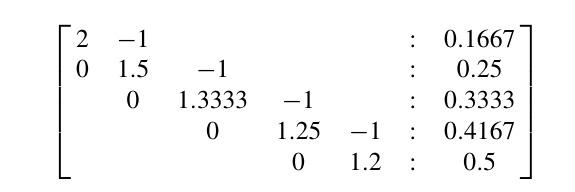


De donde obtenemos :
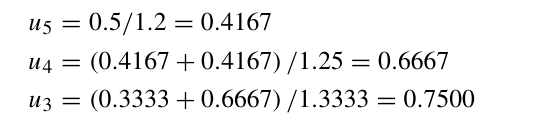



In [ ]:
r1=1/36
r1


0.027777777777777776

In [ ]:
el resultado es x= [ 2.7778e-02  2.7778e-02  5.2042e-18 -5.5556e-02 -1.3889e-01]

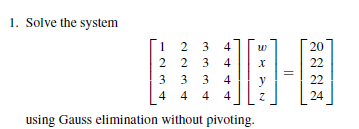

REpita el ejercicio usando pivoteo

In [ ]:
import numpy as np

def gaussElimin(A,b):
    n = len(b)
    
  # Elimination Phase
    for k in range(0,n-1):
        for i in range(k+1,n):
           if A[i,k] != 0.0:
               lam = A [i,k]/A[k,k]
               A[i,k+1:n] = A[i,k+1:n] - lam*A[k,k+1:n]
               b[i] = b[i] - lam*b[k]
  # Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+1:n],b[k+1:n]))/A[k,k]
    return b

A=np.array([[1,2,3,4.],[2,2,3,4.],[3,3,3,4.],[4,4,4,4.]])
b=np.array([20,22,22.,24])
Aorig=A.copy()
borig=b.copy()
x=gaussElimin(A,b)
np.set_printoptions(precision=15)
print(x)
print(Aorig@x-borig)


[ 2. -2.  2.  4.]
[0. 0. 0. 0.]


### *Metodos iterativos para la solución del sistema $Ax=b$*
Ya vimos que la forma de la matriz  (como en el caso de la tridiagonal) puede ayudara mejorar el algoritmo de la solución del sistema, los métodos iterativos se usan cuando la matriz es dispersa (la mayor parte de las entradas son cero )y se aprovecha la estructura de la matriz.
 Un método iterativo con el cual se resuelva la ecuación lineal $Ax=b$ comienza con una aproximación $\mathbf{x}_0$ a la solución $\mathbf{x}$, después se genera una sucesión de vectores $\{\mathbf{x}^{(k)}\}$ que convergen a $\mathbf{x}$. Los métodos Iterativos traen consigo un proceso que convierte el sistema $Ax=b$ en otro equivalente de la forma 
 
 $$\mathbf{x}=T\mathbf{x}+\mathbf{c}$$
 &nbsp; 
 para alguna matriz fija $T$ y un vector $\mathbf{c}$, luego de seleccionar $\mathbf{x}_0$ la sucesión de vectores de la solución aproximada se generan calculando:
 &nbsp; 

 $$
 \mathbf{x}^{(k)}=T\mathbf{x}^{(k-1)}+\mathbf{C}
 $$

Los métodos iterativos pueden ser vistos en terminos de la división de la matriz. Especificamente ,$A=D+L+U$ donde $L$ y $U$ son estrictamente triangulares, inferior y superiormente . Aqui $D$ es una matriz diagonal con la diagonal de $A$ en su diagonal es decir :
&nbsp;

\begin{equation}
\begin{bmatrix}
a_{11} & a_{12} & a_{13}&a_{14}\\
a_{21} & a_{22} & a_{23}&a_{24}\\
a_{31} & a_{32} & a_{33}&a_{34}\\
a_{41} & a_{42} & a_{43}&a_{44}
\end{bmatrix}
=
\begin{bmatrix}
a_{11} & 0 & 0&0\\
0 & a_{22} & 0&0\\
0 & 0 & a_{33}&0\\
0 & 0 & 0&a_{44}
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 0&0\\
a_{21} &0 & 0&0\\
a_{31} & a_{32} & 0&0\\
a_{41} & a_{42} & a_{43}&0
\end{bmatrix}
+
\begin{bmatrix}
0 & a_{12} & a_{13}&a_{14}\\
0&0 & a_{23}&a_{24}\\
0&0&0&a_{34}\\
0&0&0&0
\end{bmatrix}
\end{equation}
&nbsp;

$$
l_{ij}=\left\{ \begin{array}{lcc}
             a_{ij} &   si  & i > j \\
             0 &   \text{de otra forma}
             \end{array}
   \right.
$$
&nbsp;
$$
u_{ij}=\left\{ \begin{array}{lcc}
             a_{ij} &   si  & i < j \\
             0 &   \text{de otra forma}
             \end{array}
   \right.
$$
&nbsp;

$$
d_{ii}=a_{ii},\: d_{ij}=0,\:\text{de otra forma}
$$

Estos metodos pueden verse como un reaareglo del sistema original en la forma 
&nbsp;
$$
\begin{align}
x_1&=[b_1-(a_{12}x_2+a_{13}x_3+\cdots+a_{1n}x_n)]/a_{11} \\
x_2&=[b_2-(a_{21}x_1+a_{23}x_3+\cdots+a_{2n}x_n)]/a_{22} \\
\quad & \cdots \quad \cdots \quad \cdots \quad \cdots \quad \cdots \quad \cdots \quad \\
x_n&=[b_n-(a_{n1}x_1+a_{n2}x_2+\cdots+a_{nn-1}x_{n-1})]/a_{nn} 
\quad  (1)
\end{align}
$$
&nbsp;

Esto es el resultado de resolver la $i-{esima}$ ecuación para $x_i$. Aquí se supone que $A_{ii}\neq 0$, para el método de Jacobi, generamos el siguiente esquema de iteración vectorial en terminos matriciales tenemos 
&nbsp;
$$
x^{(k+1)}=D^{-1}\left[b-(L+U)x^{k} \right] \quad (2)
$$
&nbsp;

$$
\begin{align}
x^{(k+1)}_1&=[b_1-(a_{12}x^{(k)}_2+a_{13}x^{(k)}_3+\cdots+a_{1n}x^{(k)}_n)]/a_{11} \\
x^{(k+1)}_2&=[b_2-(a_{21}x^{(k)}_1+a_{23}x^{(k)}_3+\cdots+a_{2n}x^{(k)}_n)]/a_{22} \\
\quad & \cdots \quad \cdots \quad \cdots \quad \cdots \quad \cdots \quad \cdots \quad \\
x^{(k+1)}_n&=[b_n-(a_{n1}x^{(k)}_1+a_{n2}x^{(k)}_2+\cdots+a_{nn-1}x^{(k)}_{n-1})]/a_{nn} 
\end{align}
$$
&nbsp;

#### *Ejemplo 1*
Ejecute tres iteraciones del metodo de Jacobi para encontrar la solución del sistema
&nbsp;
$$
\begin{align}
6x_1+3x_2+2x_3&=26 \\
2x_1+5x_2+x_3&=17 \\
x_1+x_2+4x_3&=9
\end{align}
$$
&nbsp;







Rearreglando terminos obtenemos:
&nbsp;

$$
\begin{align}
x_1^{(k)}&=\frac{26-3x_2^{(k-1)}-2x_3^{(k-1)}}{6}\\
x_2^{(k)}&=\frac{17-2x_1^{(k-1)}-x_3^{(k-1)}}{5} \\
x_3^{(k)}&=\frac{9-x_1^{(k-1)}-x_2^{(k-1)}}{4}
\end{align}
$$
&nbsp;

tomando el valor inicial $x^0=\mathbf{0}$,obtenemos la siguiente iteración
&nbsp;

$$
\begin{align}
x_1^1&=\frac{26}{6}=4.3333\\
x_2^1&=\frac{17}{5}=3.4000 \\
x_3^1&=\frac{9}{4}=2.25
\end{align}
$$
&nbsp;

Las siguientes dos iteraciones producen 
&nbsp;

$$x_1^2=1.8833,\:x_2^2=1.2176,\:x_3^2=0.3167$$
&nbsp;
y
&nbsp;

$$x_1^3=3.6194,\:x_2^3=1.25833\:x_3^3=1.4750$$
&nbsp;

este esquema converge lentamente a la solución exacta $[3,2,1]^T$. De hecho $x^9=[3.0498,2.0420,1.053]^T$

In [ ]:
import numpy as np
def Jacobit(A,b,Nits):
    """
    executa el metodo de Jacobi para Ax=b
    'A' debe de ser cuadrada
    """
    D=np.diag(A)
    n=A.shape[0]
    A_D=A-np.diag(D) # esto es L+U
    x=np.zeros(n)
    s=np.zeros((n,Nits))
    for k in range(Nits):
        x=(b-A_D.dot(x))/D
        s[:,k]=x
    
    return s

In [ ]:
A=np.array([[6.,3.,2.],[2.,5.,1.],[1.,1.,4.]])
b=np.array([26.,17.,9.])
Nits=9
s=Jacobit(A,b,Nits)
print(s)

[[4.33333333 1.88333333 3.61944444 2.55       3.27162037 2.81386574
  3.11679012 2.92211073 3.04978787]
 [3.4        1.21666667 2.58333333 1.65722222 2.24013889 1.85171296
  2.10004167 1.93656289 2.0419973 ]
 [2.25       0.31666667 1.475      0.69930556 1.19819444 0.87206019
  1.08360532 0.94579205 1.0353316 ]]


##Tarea corregir la impresión

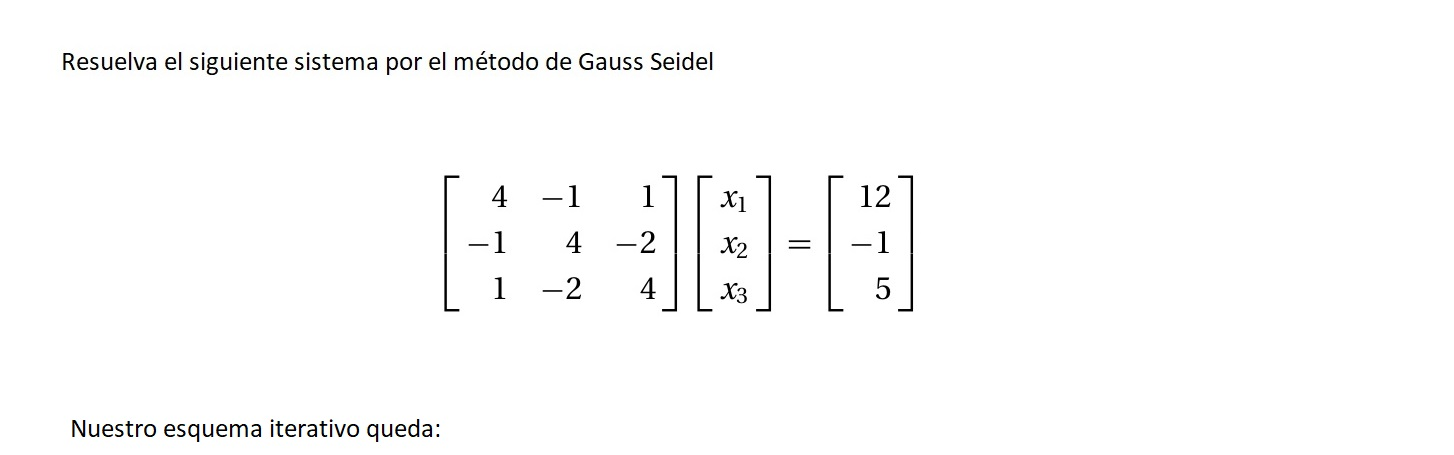

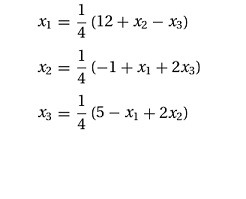

tomando como aproximación inicial $x_0=0$

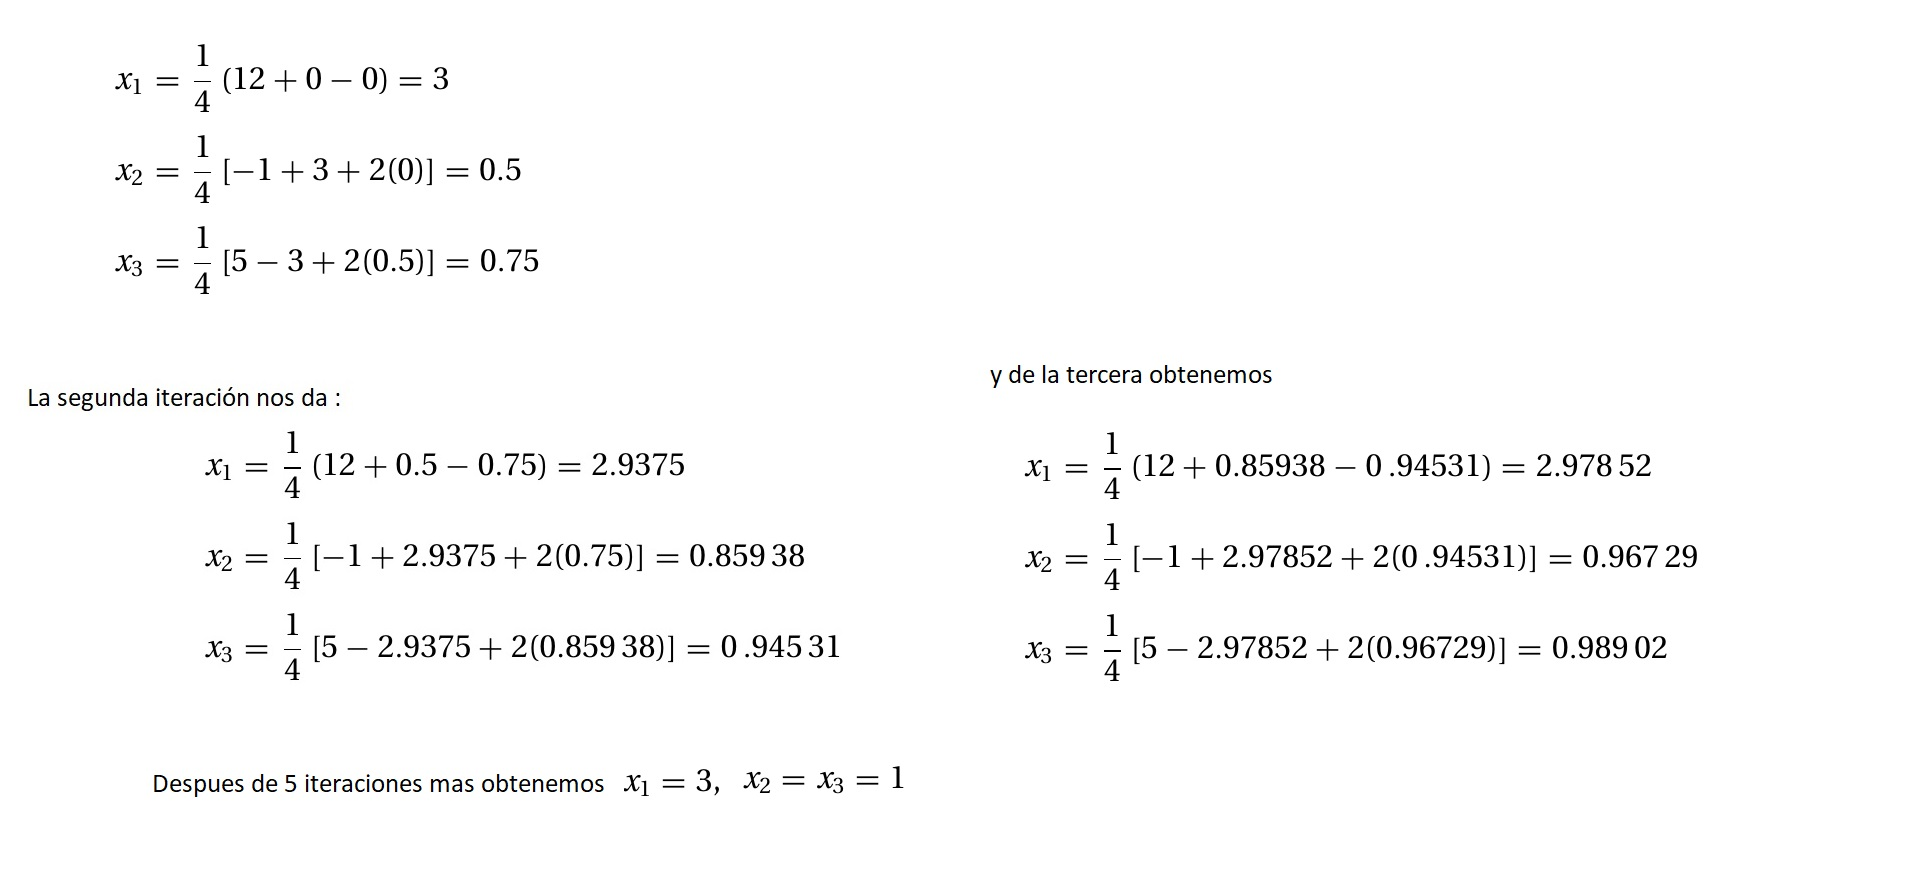

## Tarea 
Hacer 4ta y 5ta iteración

$$x_i^{(k)}=\frac{-\sum_{j=1}^{i-1}(a_{ij}x_j^{k})-\sum_{j=i+1}^{n}(a_{ij}x_j^{k-1})}{a_{ii}}+b_i$$

&nbsp;
$$
\begin{align}
a_{i1}x_1^{(k)}+a_{i2}x_2^{(k)}+\cdots+a_{ii}x_i^{(k)}=-a_{ii+1}x_{i+1}^{(k-1)}-a_{i{i+2}}x_{i+2}^{(k-1)}+\cdots+a_{in}x_n^{(k-1)}+b_i
\end{align}
$$

Desarrollando para $i=1,2,\cdots,n$
&nbsp;

$$
\begin{align}
&a_{11}x_1^{(k)}\quad \quad \quad \quad &=&-a_{12}x_{2}^{(k-1)}-a_{13}x_{3}^{(k-1)}-\cdots-a_{1n}x_n^{(k-1)}+b_1\\
&a_{21}x_1^{(k)}+a_{22}x_2^{(k)}&=&-a_{23}x_{3}^{(k-1)}-a_{24}x_{4}^{(k-1)}-\cdots-a_{2n}x_n^{(k-1)}+b_2\\
&\vdots    \quad \quad \quad \quad  &\vdots & \quad \quad\vdots \quad \quad\vdots \\
&a_{n1}x_1^{(k)}+a_{n2}x_2^{(k)}+\cdots+a_{nn}x_n^{(k)}&=& \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad   b_n
\end{align}
$$

Con las definiciones de $D,\:L,\:\text{y}\:U$, podemos escribir el sistema como
&nbsp;

$$ (D+L)x^{(k)}=Ux^{(k-1)}+b$$
&nbsp;

o bien 
&nbsp;

$$ x^{(k)}=(D+L)^{-1}Ux^{(k-1)}+(D+L)^{-1}b$$
para $k=1,2,\dots$

DE aquí podemos escribir el sistema como 
&nbsp;
$$ x^{(k)}=Tx^{(k-1)}+C$$

donde $T=(D+L)^{-1}U$ y $C=(D+L)^{-1}b$

### Tarea 17/11/20
Progrmar una función para Gauss-Seidel

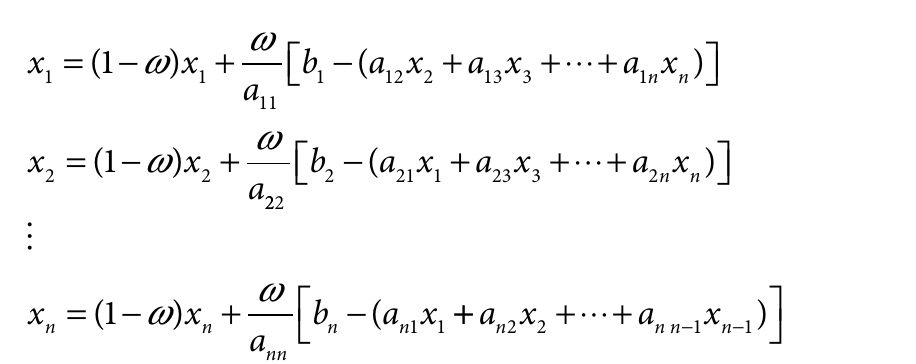

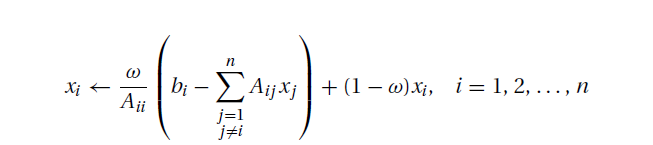

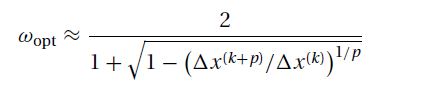

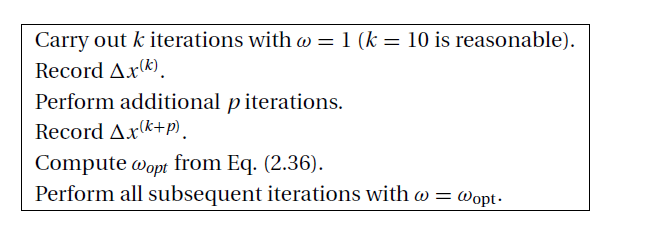

In [ ]:
## module gaussSeidel
""" x,numIter,omega = gaussSeidel(iterEqs,x,tol = 1.0e-9)
Gauss-Seidel method for solving [A]{x} = {b}.
The matrix [A] should be sparse. User must supply the
function iterEqs(x,omega) that returns the improved {x},
given the current {x} (’omega’ is the relaxation factor)"""
import numpy as np
def gaussSeidel(iterEqs,x,tol = 1.0e-9):
  omega = 1.0
  k = 10
  p = 1
  for i in range(1,501):
    xOld = x.copy()
    x = iterEqs(x,omega)
    dx = math.sqrt(np.dot(x-xOld,x-xOld))
  if dx < tol:
     return x,i,omega
  # Compute relaxation factor after k+p iterations
  if i ==k:
     dx1 = dx
  if i == k + p:
     dx2 = dx
     omega = 2.0/(1.0 + np.sqrt(1.0- (dx2/dx1)**(1.0/p)))
  print('Gauss-Seidel failed to converge')

  